In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('car_insurance_claim.csv')
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [3]:
df.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.000000,10295.000000,10302.000000,9754.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,4.956631e+08,0.169288,44.837397,0.720443,10.474062,33.416424,5.329159,0.800718,1.710153,8.298148,0.266550
std,2.864675e+08,0.506512,8.606445,1.116323,4.108943,15.869687,4.110795,1.154079,2.159015,5.714450,0.442177
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.442869e+08,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.970043e+08,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000,0.000000
75%,7.394551e+08,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000,1.000000


In [12]:
#df['INCOME'] = df['INCOME'].replace({'\$':'',',':''}, regex = True)
df['INCOME'] = df['INCOME'].replace({'\$':'',',':''}, regex = True).astype(int)

In [8]:
df['INCOME'].isna()
df['INCOME'].isna().sum()

9732


570

In [13]:
df['INCOME'].fillna(0, inplace = True)
df['INCOME']

0         67349
1         91449
2         52881
3         16039
4             0
          ...  
10297    164669
10298    107204
10299     39837
10300     43445
10301     53235
Name: INCOME, Length: 10302, dtype: int32

In [14]:
type(df['INCOME'][0])

numpy.int32

In [15]:
df.shape

(10302, 27)

In [16]:
df.dropna(inplace = True)
df.shape

(8094, 27)

In [21]:
df['INCOME'].replace([0], np.nan, inplace =True)
print(df['INCOME'])

0         67349.0
1         91449.0
2         52881.0
3         16039.0
4             NaN
           ...   
10296     43112.0
10297    164669.0
10299     39837.0
10300     43445.0
10301     53235.0
Name: INCOME, Length: 8094, dtype: float64


In [22]:
dfd = pd.read_csv('diabetes.csv')
dfd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


(array([ 35.,   0.,   0.,   1.,   2.,   0.,   2.,  11.,  35.,  72., 115.,
        146., 144.,  99.,  68.,  19.,   7.,   7.,   4.,   1.]),
 array([  0. ,   6.1,  12.2,  18.3,  24.4,  30.5,  36.6,  42.7,  48.8,
         54.9,  61. ,  67.1,  73.2,  79.3,  85.4,  91.5,  97.6, 103.7,
        109.8, 115.9, 122. ]),
 <BarContainer object of 20 artists>)

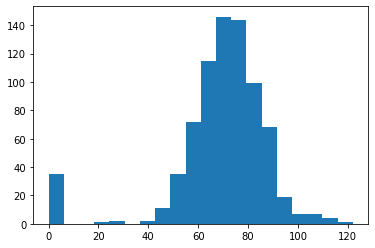

In [24]:
import matplotlib.pyplot as plt
plt.hist(dfd['BloodPressure'].dropna(), 20)

Text(0, 0.5, 'Frequency of Patients with BP')

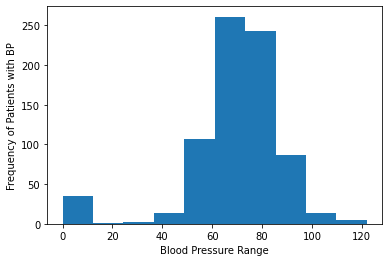

In [25]:
import matplotlib.pyplot as plt
plt.hist(dfd['BloodPressure'].dropna(), 10)
plt.xlabel('Blood Pressure Range')
plt.ylabel('Frequency of Patients with BP')


In [27]:
normal = (dfd['BloodPressure'] <80) & (dfd['BloodPressure'] >=60)
normal

0       True
1       True
2       True
3       True
4      False
       ...  
763     True
764     True
765     True
766     True
767     True
Name: BloodPressure, Length: 768, dtype: bool

In [28]:
normal.sum()

442

In [29]:
normal.mean()

0.5755208333333334